Hill Climbing Approach

In [19]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531 
# Write a program to implement Hill climbing approach using python.

In [20]:
# Hill Climbing Algorithm: Hill climbing is an optimization algorithm. Hill climbing algorithm is a local search algorithm which continuously moves in the direction of increasing elevation/value to find the peak of the mountain or best solution to the problem. It terminates when it reaches a peak value where no neighbor has a higher value.
# Hill climbing algorithm is Traveling-salesman Problem in which we need to minimize the distance traveled by the salesman. It is also called greedy local search as it only looks to its good immediate neighbor state and not beyond that.

Solving Travelling Salesman Problem using Hill climbing Algorithm.

In [21]:
# Importing libraries
import math
import matplotlib.pyplot as plt

Initial Graph of the nodes: 


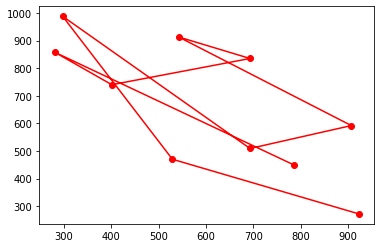

In [22]:
# Input file gives us the coordinates of nodes 
f = open('input.txt', 'r')

# Read input from file
# Number of cities and their x and y coordinates
n = int(f.readline())
xcord = [float(x) for x in f.readline().split(' ')][:n]
ycord = [float(x) for x in f.readline().split(' ')][:n]

# Initialize the graph of these nodes
print("Initial Graph of the nodes: ")
plt.show()
axes = plt.gca()
line, = axes.plot(xcord, ycord, 'ro-')

In [23]:
# Calculating Euclidean distance between two cities
def dist(xcord, ycord, i, j):
    x1, y1 = xcord[i], ycord[i]
    x2, y2 = xcord[j], ycord[j]
    return (math.sqrt((x1-x2)**2 + (y1-y2)**2))


In [24]:
# Generate a start state and the ordered coordinates
x = [i for i in range(n)]
xcord = [xcord[x[i]] for i in range(n)]
ycord = [ycord[x[i]] for i in range(n)]

# Calculate initial cost of start state
initial_cost = sum([dist(xcord, ycord, i, (i+1) % n) for i in range(n)])


In [25]:
# Calculate heuristic cost of a state
def heuristic(xcord, ycord, i, j, current_cost):
    total = current_cost

    # special case of 0 and n-1, we swap i and j
    if i == 0 and j == n-1:
        i, j = j, i

    if j != (i+1) % n:
        # if i and j are not adjacent
        total -= dist(xcord, ycord, i, (i+1) % n)
        total -= dist(xcord, ycord, j, (j-1+n) % n)
        total += dist(xcord, ycord, j, (i+1) % n)
        total += dist(xcord, ycord, i, (j-1+n) % n)

    total -= dist(xcord, ycord, i, (i-1+n) % n)
    total -= dist(xcord, ycord, j, (j+1) % n)
    total += dist(xcord, ycord, i, (j+1) % n)
    total += dist(xcord, ycord, j, (i-1+n) % n)
    return (total)

In [26]:
# Visualize a solution
# Plotting the graph for each Itteration
def draw(finished, iteration, cost):

    # Add coordinates of first city to end
    # To draw an edge from last to first city
    newxcord = xcord.copy() + [xcord[0]]
    newycord = ycord.copy() + [ycord[0]]

    # Update graph
    line.set_xdata(newxcord)
    line.set_ydata(newycord)

    # Update title of the graph
    title = "Final " if finished else "iteration no. %d \n" % iteration
    title = title + ("total distance = %.2f \n" % cost)
    plt.title(title, fontsize=15)

    # Maximize the window size of graph
    figManager = plt.get_current_fig_manager()
    figManager.full_screen_toggle()

    # To plot the updated graph
    plt.plot(newxcord, newycord, 'ro-')
    plt.show()
    plt.pause(0.1)


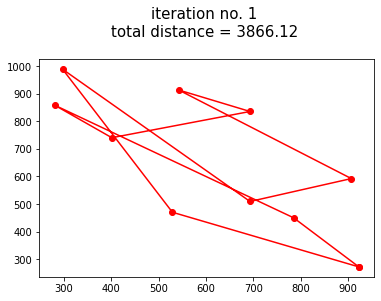

Iteration =  1
Total Distance covered = 3866.12
Swapping the nodes to change the states: 
Swapped  2 and 9


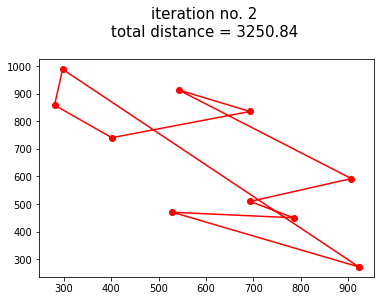

Iteration =  2
Total Distance covered = 3250.84
Swapping the nodes to change the states: 
Swapped  0 and 5


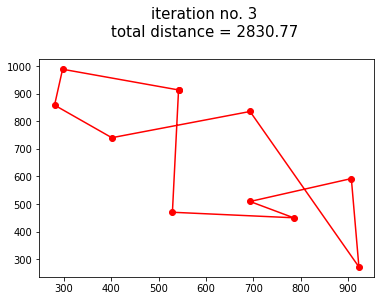

Iteration =  3
Total Distance covered = 2830.77
Swapping the nodes to change the states: 
Swapped  1 and 6


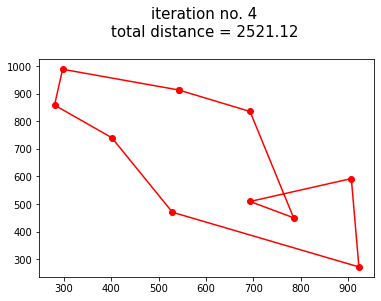

Iteration =  4
Total Distance covered = 2521.12
Swapping the nodes to change the states: 
Swapped  2 and 4


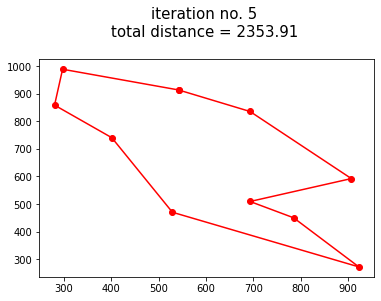

Iteration =  5
Total Distance covered = 2353.91
Swapping the nodes to change the states: 
Swapped  3 and 5


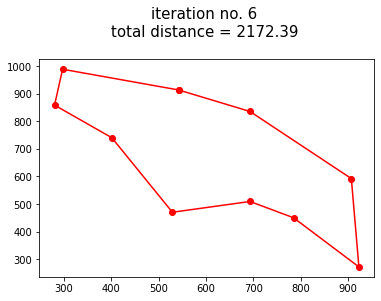

Iteration =  6
Total Distance covered = 2172.39
Finishing the iterations: 
Final order =  [5, 6, 4, 0, 9, 3, 1, 7, 8, 2]
Initial cost =  3866.1177285085173
Final cost =  2172.3942895991026
Total Optimization =  1693.7234389094147


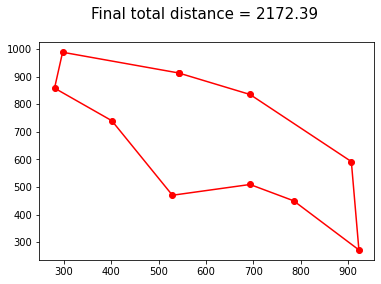

In [27]:
# Driving Function
def main(xcord, ycord, initial_cost, x):
    current_cost = initial_cost

    for t in range(200):
        # Draw intermediate solution
        draw(False, t+1, current_cost)

        # cost of current state
        print("Iteration = ", t+1)
        print("Total Distance covered = %.2f" % current_cost)

        newtotal = current_cost
        swapi, swapj = -1, -1

        for i in range(n):
            for j in range(n):
                if i != j and i < j:
                    # get heuristic cost of successor
                    neighbour = heuristic(xcord, ycord, i, j, current_cost)

                    # if successor is better than current, mark it as best successor
                    if neighbour < newtotal:
                        newtotal = neighbour
                        swapi = i
                        swapj = j

        if newtotal < current_cost:
            # select the best successor and apply the rule
            x[swapi], x[swapj] = x[swapj], x[swapi]
            xcord[swapi], xcord[swapj] = xcord[swapj], xcord[swapi]
            ycord[swapi], ycord[swapj] = ycord[swapj], ycord[swapi]
            current_cost = newtotal
            print("Swapping the nodes to change the states: ")
            print("Swapped ", swapi, "and", swapj)
        else:
            # halt
            print("Finishing the iterations: ")
            break

    # Show final status
    print("Final order = ", x)
    print("Initial cost = ", initial_cost)
    print("Final cost = ", current_cost)
    print("Total Optimization = ", initial_cost-current_cost)

    # Show the final solution and the Plot
    draw(True, 0, current_cost)
    plt.show()


main(xcord, ycord, initial_cost, x)
